In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
from __init__ import *
import numpy as np
from export.saver import read_pickle, save_pickle
from read.svg_reader import SVGReader
from helpers.helpers import filter_none
from placement2.attract import *
from visuals.plotter import plot_general
from copy import deepcopy
import networkx as nx
from itertools import pairwise, accumulate, product
from functools import reduce
from operator import add
from helpers.helpers import sort_and_group_objects
from cli.test import *
from domains.domain import Domain

In [3]:
case  = "amber_a_f01.svg"
sv = SVGReader(case)
sv.run()
# ag = AdjacencyGenerator(sv.layout, buffer_size=0.17)
# ag.run() # TODO shouldnt run if sv.layout is empty
# ag.draw_graph()
domains = sv.layout.domains
pos = create_pos(domains)


In [4]:
plot_general(sv.layout.domains)


In [5]:
ad, Gx, Gy = adjust_domains(domains)

In [7]:
plot_general(ad)

In [29]:
from fixes.interfaces import Direction
from typing import NamedTuple

class DirectedDomain(NamedTuple):
    drn: Direction
    domain: Domain


def assign_directions(ax, lesser, greater):
    if ax == "x":
        return [DirectedDomain(Direction.WEST, lesser), DirectedDomain(Direction.EAST, greater)]
    elif ax == "y":
        return [DirectedDomain(Direction.SOUTH, lesser), DirectedDomain(Direction.NORTH, greater)]
    else:
        raise Exception("Invalid ax")


In [27]:



def is_not_touching(edge, domains: dict[str, Domain], ax):
    u,v  = sorted([domains[i] for i in edge], key=lambda i: i[ax].min)
    dif = v[ax].min - u[ax].max
    if dif != 0:
        return dif, assign_directions(ax, u,v)
        
    




In [ ]:
# def distance_between()

In [32]:

filter_none([is_not_touching(e, ad, "x") for e in Gx.edges])

    

[(Decimal('0.20'),
  [DirectedDomain(drn=<Direction.WEST: 3>, domain=Domain(laundry, x=[3.22-4.82], y=[4.02-5.77])),
   DirectedDomain(drn=<Direction.EAST: 2>, domain=Domain(bath, x=[5.02-7.34], y=[3.15-4.38]))]),
 (Decimal('0.20'),
  [DirectedDomain(drn=<Direction.WEST: 3>, domain=Domain(m_bath, x=[4.82-7.14], y=[4.38-5.68])),
   DirectedDomain(drn=<Direction.EAST: 2>, domain=Domain(m_bedroom, x=[7.34-9.47], y=[3.15-5.89]))])]

In [ ]:
sorted([domains[i] for i in edge], key=lambda i: i[ax].min)

In [10]:
Gx.edges

OutEdgeView([('bedroom_1', 'transit_space'), ('bedroom_1', 'laundry'), ('transit_space', 'bath'), ('transit_space', 'dining'), ('laundry', 'm_bath'), ('laundry', 'bath'), ('kitchen', 'dining'), ('dining', 'closet'), ('dining', 'm_closet'), ('m_bath', 'm_bedroom'), ('bath', 'm_bedroom'), ('bedroom_2', 'transit_space'), ('bedroom_2', 'kitchen')])

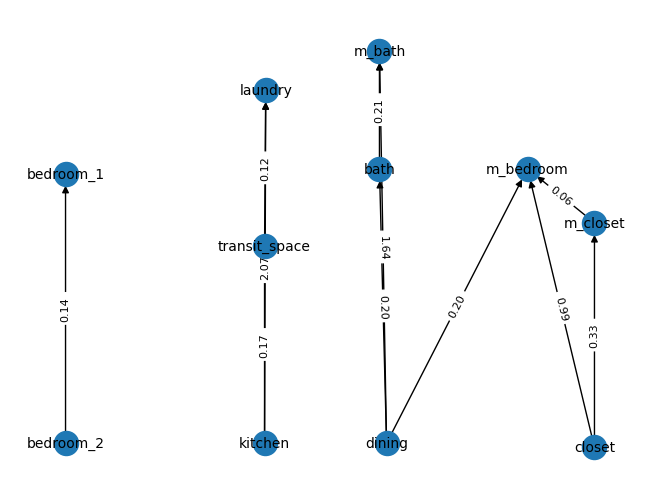

In [17]:
draw_digraph(Gy, domains)

In [19]:
from pprint import pprint

pprint(Gy.edges)

OutEdgeView([('kitchen', 'transit_space'), ('kitchen', 'laundry'), ('transit_space', 'laundry'), ('m_closet', 'm_bedroom'), ('bath', 'm_bath'), ('dining', 'm_bedroom'), ('dining', 'bath'), ('dining', 'm_bath'), ('closet', 'm_closet'), ('closet', 'm_bedroom'), ('bedroom_2', 'bedroom_1')])
